In [31]:
import pandas as pd
df = pd.read_csv("datasets/table_4_17.csv", header=None)

samples = df[[0]].values
labels = df[[1]].values

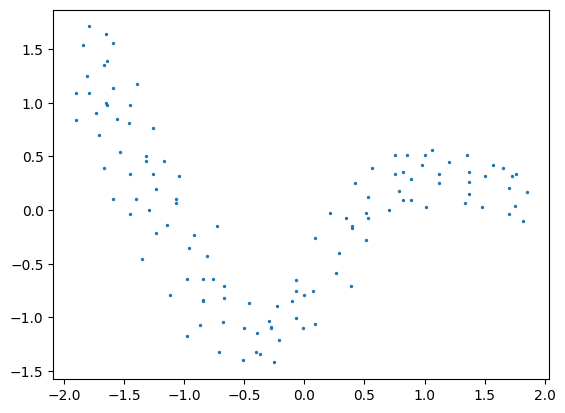

In [32]:
import matplotlib.pyplot as plt

plt.scatter(samples, labels, s=2)

In [33]:
import quark

ff_model = quark.Model("IterativeFeedForward")

ff_sample = samples.tolist()
ff_labels = labels.tolist()

ff_l1 = quark.Layer("Gradient", 10, 1, 0.01, "Sigmoid", 1, True)
ff_l2 = quark.Layer("Gradient", 1, 10, 0.01, "Linear", 1, True)
ff_model.push_layer(ff_l1)
ff_model.push_layer(ff_l2)

ff_model.fit(ff_sample, ff_labels, 100, 0.05)

Minimum atteint: 0.05512687134665679


Text(0, 0.5, 'Mean Square Error')

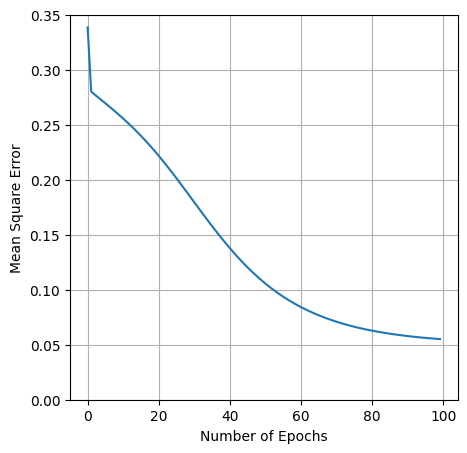

In [34]:
import matplotlib.pyplot as plt

mse = ff_model.mse
print(f"Minimum atteint: {min(mse)}")
len(mse)

plt.figure(figsize=(5, 5))
plt.plot(range(len(mse)), mse)
plt.ylim(0, 0.35)
plt.grid()

plt.xlabel("Number of Epochs")
plt.ylabel("Mean Square Error")

Text(0, 0.5, 'x2')

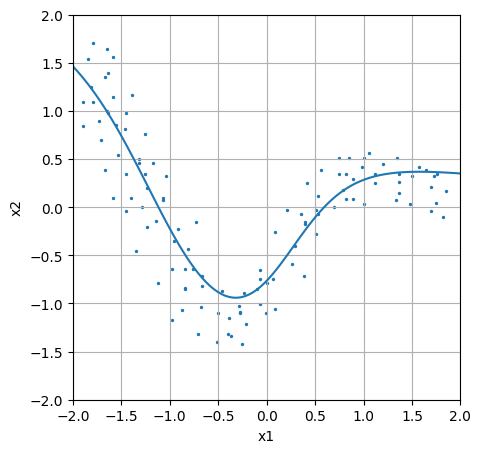

In [35]:
import matplotlib.pyplot as plt
import numpy as np

xlim = [-2, 2]
ylim = [-2, 2]
step = 0.1

plt.figure(figsize=(5, 5))

f2 = np.vectorize(ff_model.predict)

X = np.linspace(xlim[0], xlim[1], 100)
Y = []
for x in X:
    Y.append(ff_model.predict([x]))

plt.plot(X, Y)

plt.scatter(samples, labels, s=2)

plt.xlim(xlim[0], xlim[1])
plt.ylim(ylim[0], ylim[1])
plt.grid()

plt.xlabel("x1")
plt.ylabel("x2")